In [1]:
from pctstp import *
from data import *

In [2]:
G, pairs, altruistic_donors, nodes, edges, all_cycles = get_data(file="data/Dataset16.xlsx", max_cycle=3, pc_tsp=True)

In [3]:
opt_val, selected_edges, selected_cycles, time_taken = pctsp(G, pairs, altruistic_donors, nodes, edges, all_cycles, noisy=1)

c:\Users\fbahz\OneDrive\3. The University of Edinburgh\2. Semester 2\Topics in Applied Operational Research\Project\taor_project\pctstp.py:221: LicenseWarning: Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('C:/xpressmp/bin/xpauth.xpr')

  model = xp.problem()


FICO Xpress v9.4.2, Hyper, solve started 15:31:53, Mar 12, 2025
Heap usage: 3003KB (peak 3003KB, 214KB system)
Maximizing MILP noname using up to 14 threads and up to 15GB memory, with these control settings:
MAXTIME = 1200
OUTPUTLOG = 1
MIPRELSTOP = .1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
      1062 rows         7361 cols        16237 elements      7361 entities
Presolved problem has:
       665 rows         6994 cols        16084 elements      6994 entities
Presolve finished in 0 seconds
Heap usage: 4559KB (peak 6402KB, 214KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e+00,  2.56e+02] / [ 1.00e+00,  2.56e+02]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 8.6GB
 

In [4]:
opt_val

8070.0

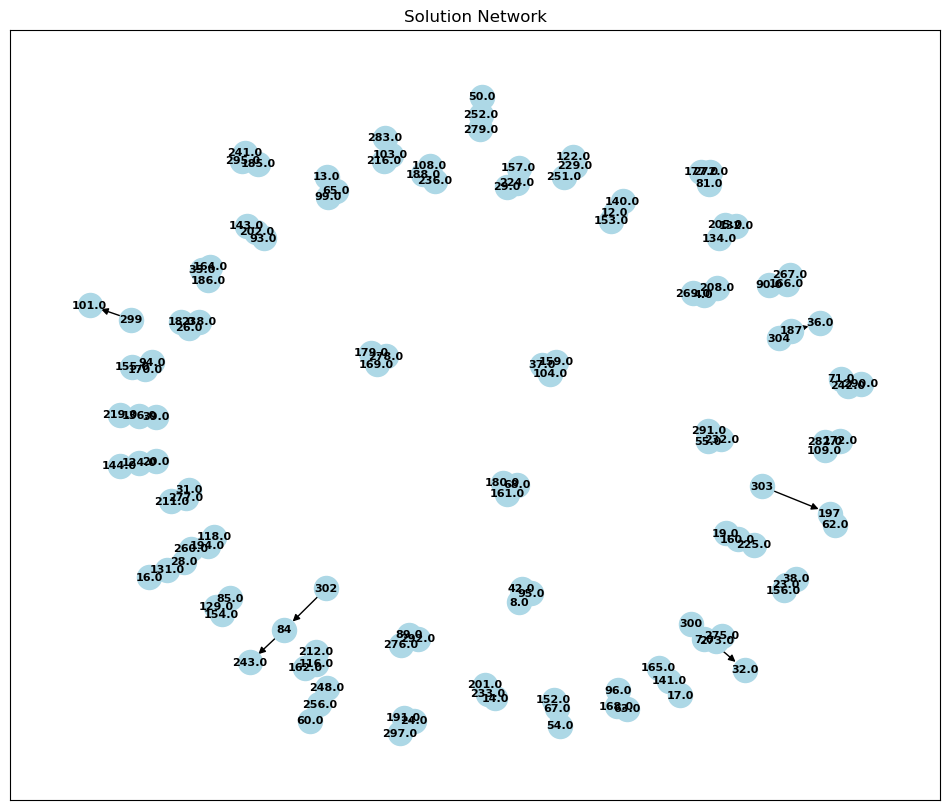

3


In [5]:
import matplotlib.pyplot as plt

def solution_network(edges, cycles):
    G = nx.DiGraph() 

    # Add edges
    for e in edges:
        G.add_edge(e[0], e[1])

    # Keep track of which edges are in cycles
    cycle_edges = set()

    # Add cycles
    for c in cycles:
        for i in range(len(c)):
            u, v = c[i], c[(i + 1) % len(c)]
            G.add_edge(u, v)
            cycle_edges.add((u, v))

    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)  

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300)

    non_cycle_edges = [e for e in G.edges() if e not in cycle_edges]
    nx.draw_networkx_edges(G, pos, edgelist=non_cycle_edges, edge_color='black', arrows=True)

    nx.draw_networkx_edges(G, pos, edgelist=list(cycle_edges), edge_color='red', width=2, arrows=True)

    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    plt.title("Solution Network")
    plt.show()

    return G

check = solution_network(selected_edges, selected_cycles)
cycles_check = max(map(len,list(nx.simple_cycles(check))))

print(cycles_check)


##########################################################
OPTIMIZATION COMPLETE: no cycles of length more than 3.
##########################################################

The optimization took 0.5714538097381592 seconds to execute.



Total Benefit: 12561.0





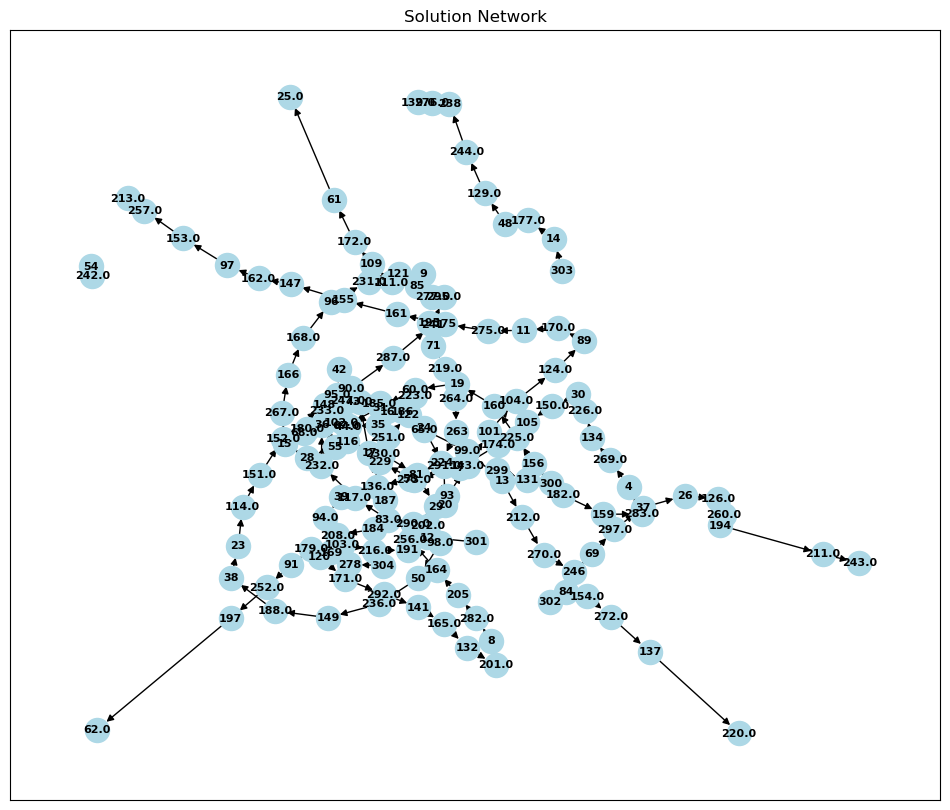

In [6]:
from tiaor import *
opt_val2, solution_edges2, _, _, _ = ra(pairs, altruistic_donors, edges, noisy=1)


solution_network(solution_edges2, [])

In [8]:
solution_edges2
selected_edges

# Find elements in solution_edges2  but not in selected_edges
unique_to_selected_edges = set(solution_edges2).difference(set(selected_edges))

# Convert back to a list if needed
unique_to_selected_edges_list = list(unique_to_selected_edges)

for e in unique_to_selected_edges_list:
    print(e)

(38, 23.0)
(278, 169.0)
(67, 68.0)
(224, 58.0)
(103, 216.0)
(136, 39.0)
(7, 273.0)
(267, 166.0)
(156, 225.0)
(225, 160.0)
(155, 147.0)
(164, 256.0)
(211, 243.0)
(94, 103.0)
(14, 177.0)
(272, 137.0)
(162, 97.0)
(35, 44.0)
(282, 205.0)
(24, 291.0)
(264, 263.0)
(29, 98.0)
(37, 26.0)
(131, 182.0)
(93, 143.0)
(175, 161.0)
(273, 229.0)
(143, 101.0)
(48, 129.0)
(177, 48.0)
(26, 126.0)
(172, 61.0)
(116, 230.0)
(276, 139.0)
(147, 162.0)
(159, 283.0)
(68, 180.0)
(121, 9.0)
(201, 8.0)
(134, 226.0)
(109, 172.0)
(132, 201.0)
(170, 11.0)
(9, 277.0)
(260, 194.0)
(216, 191.0)
(291, 20.0)
(180, 116.0)
(242, 54.0)
(39, 94.0)
(129, 244.0)
(95, 102.0)
(169, 179.0)
(16, 65.0)
(151, 152.0)
(15, 267.0)
(81, 29.0)
(96, 231.0)
(202, 93.0)
(270, 246.0)
(137, 220.0)
(303, 14.0)
(232, 36.0)
(141, 165.0)
(252, 197.0)
(89, 170.0)
(241, 295.0)
(42, 95.0)
(31, 67.0)
(179, 91.0)
(50, 236.0)
(65, 99.0)
(186, 35.0)
(85, 111.0)
(185, 24.0)
(98, 50.0)
(283, 4.0)
(191, 202.0)
(4, 269.0)
(295, 85.0)
(299, 131.0)
(30, 150.0)